# Visualize and Evaluate model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib
import argparse
import os
from os.path import isfile,join
import random
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import torch.utils.data as tud
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torchvision.utils as vutils
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import random_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from collections import Counter
from sklearn.metrics import jaccard_score
import pickle
import sys
sys.path.insert(1, '../utils')
sys.path.insert(1, '../datasets')
sys.path.insert(1, '../search')
import my_datasets as mdset
import eval_train as ev
import utils as U
import find_best_model as fbm
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from torchmetrics import IoU




## Parameters

In [3]:
# DATASETS
dataroot_voc = '/share/DEEPLEARNING/datasets/voc2012'
dataroot_sbd = '/share/DEEPLEARNING/datasets/sbd'
dataroot_coco = '/share/DEEPLEARNING/datasets/coco'
dataroot_landcover = '/share/DEEPLEARNING/datasets/landcover'
dataroot_coco2voc = '/users/k/karmimy/data/coco2voc'
VOC = False

nw = 4 
pm = True
#MODEL SAVE AND LOAD 
load_dir = '/share/homes/karmimy/equiv/save_model' # Saved model dir
#exp = 'rot_equiv_lc' # Exp dir
exp = 'rot_equiv' 
#model_name = 'rot_equiv_lc.pt' # saved model name
model_name = 'equiv_dlv3.pt'
folder_model = join(load_dir,exp,'92') 
#fcn= True
#pretrained=True

# GPU 
gpu = 0
# EVAL PARAMETERS
bs = 1 

# LOSS 
criterion_supervised = nn.CrossEntropyLoss(ignore_index=21) # On ignore la classe border.
Loss = 'KL' # Loss = 'KL' or 'CE' or None for L1,MSE…
criterion_unsupervised = U.get_criterion(Loss)


# DEVICE
# Decide which device we want to run on
device = torch.device("cuda:"+str(gpu) if torch.cuda.is_available() else "cpu")
print("device :",device)

device : cuda:0


## DATASETS

In [4]:
if VOC :
        num_classes = 21
        test_dataset = mdset.VOCSegmentation(dataroot_voc,year='2012', image_set='val', download=False)
        
else:
        num_classes = 4
        print('Loading Landscape Dataset')
        test_dataset = mdset.LandscapeDataset(dataroot_landcover,image_set="test")
        test_dataset_no_norm =  mdset.LandscapeDataset(dataroot_landcover,image_set="test",normalize=False)
        print('Success load Landscape Dataset')

dataloader_val = torch.utils.data.DataLoader(test_dataset,num_workers=nw,pin_memory=pm,\
        batch_size=bs)

Loading Landscape Dataset
Success load Landscape Dataset


## SHOW MODEL PREDICTIONS

In [5]:
# PARAMETERS FOR THE VISUALIZATION 
NUMBER_EXAMPLES = 10
list_iter = np.random.randint(0,len(test_dataset),NUMBER_EXAMPLES) # TAKE N RANDOM IMAGES 
#list_iter = np.arange(10,10+NUMBER_EXAMPLES)

angle_fix = 0
test_dataset = mdset.LandscapeDataset(dataroot_landcover,image_set="test")
test_dataset_no_norm =  mdset.LandscapeDataset(dataroot_landcover,image_set="test",normalize=False)
print('Success load Landscape Dataset')
dataloader_val = torch.utils.data.DataLoader(test_dataset,num_workers=nw,pin_memory=pm,\
        batch_size=bs)

CMAP = U.get_cmap_landcover()



Success load Landscape Dataset


In [ ]:
i,m = test_dataset_no_norm.__getitem__(452)
i = i.transpose_(0,2)
i = i.transpose_(0,1)
plt.imshow(i)

In [ ]:
i,m = test_dataset.__getitem__(452)
pred = model(x)
pred = pred['out']
pred = pred.argmax(dim=1).squeeze().cpu()


ITERATION 1053 / 10
ITERATION 448 / 10
ITERATION 695 / 10
ITERATION 857 / 10
ITERATION 1455 / 10
ITERATION 696 / 10
ITERATION 984 / 10
ITERATION 105 / 10
ITERATION 528 / 10
ITERATION 1533 / 10


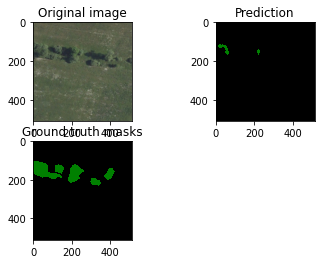

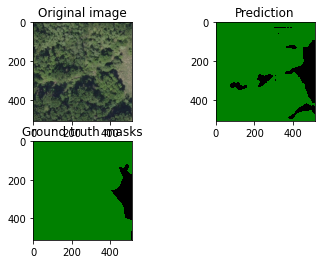

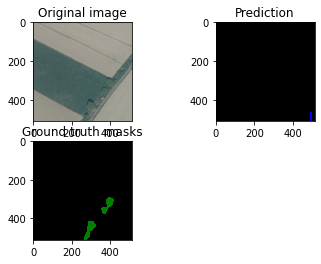

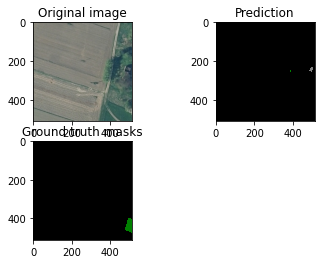

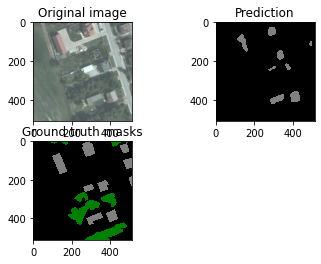

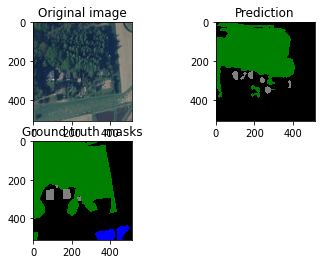

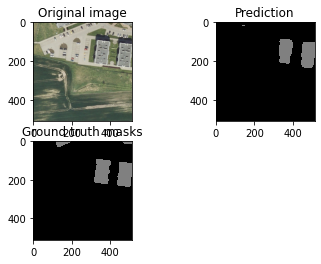

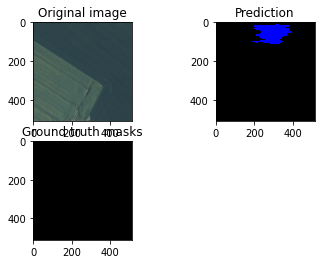

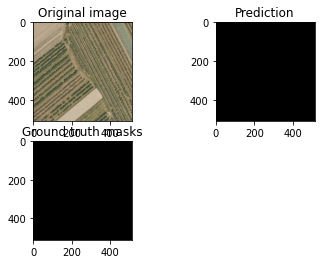

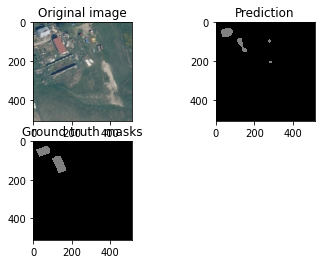

In [6]:
model = torch.load('/share/homes/karmimy/equiv/save_model/fully_supervised_lc/31/fcn_fully_sup_lc.pt',map_location=device)
for i in list_iter:
    print('ITERATION',i,'/',NUMBER_EXAMPLES)
    im,m = test_dataset_no_norm.__getitem__(i)
    x = im.unsqueeze(0).to(device)
    pred = model(x)
    pred = pred['out']
    pred = pred.argmax(dim=1).squeeze().cpu()
    im.transpose_(0,2)
    im.transpose_(0,1)
    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax1.title.set_text('Original image')
    ax1.imshow(im.cpu())
    ax2 = fig.add_subplot(2,2,2)
    ax2.title.set_text('Prediction')
    ax2.imshow(pred,cmap=CMAP,vmin=0,vmax=3,interpolation='nearest')
    ax3 = fig.add_subplot(2,2,3)
    ax3.title.set_text('Ground truth masks')
    ax3.imshow(m.cpu(),cmap=CMAP,vmin=0,vmax=3,interpolation='nearest')
    




ITERATION 365 / 10
ITERATION 225 / 10
ITERATION 492 / 10
ITERATION 1595 / 10
ITERATION 209 / 10
ITERATION 452 / 10
ITERATION 1379 / 10
ITERATION 325 / 10
ITERATION 1122 / 10
ITERATION 1167 / 10


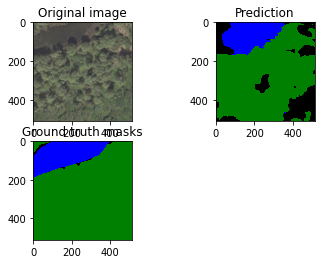

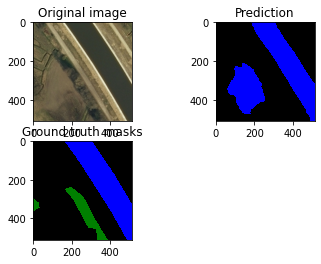

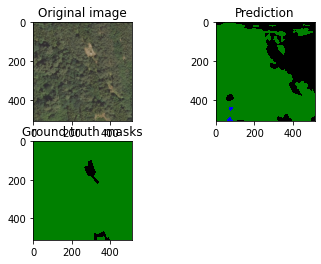

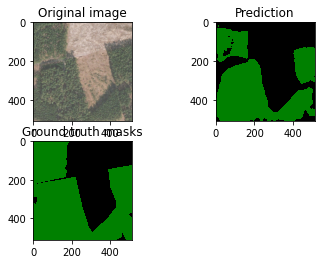

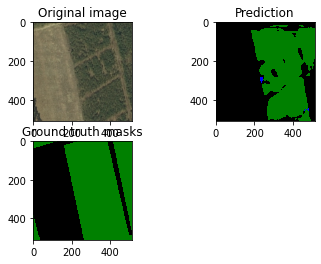

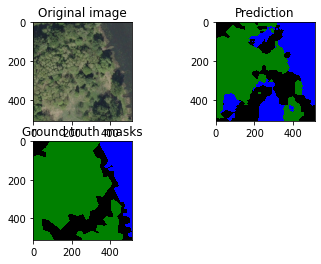

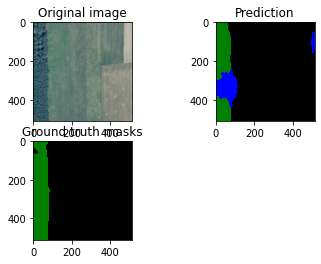

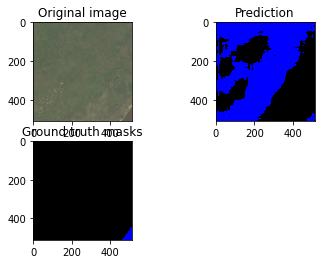

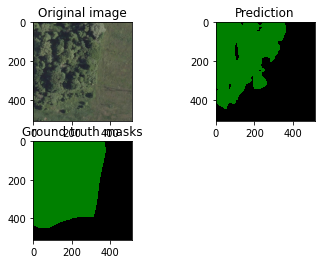

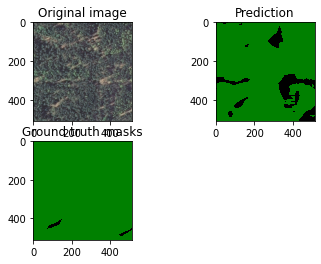

In [11]:
model = torch.load('/share/homes/karmimy/equiv/save_model/fully_supervised_lc/30/fcn_fully_sup_lc.pt',map_location=device)

for i in list_iter:
    print('ITERATION',i,'/',NUMBER_EXAMPLES)
    im,m = test_dataset_no_norm.__getitem__(i)
    x = im.unsqueeze(0).to(device)
    pred = model(x)
    pred = pred['out']
    pred = pred.argmax(dim=1).squeeze().cpu()
    im.transpose_(0,2)
    im.transpose_(0,1)
    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax1.title.set_text('Original image')
    ax1.imshow(im.cpu())
    ax2 = fig.add_subplot(2,2,2)
    ax2.title.set_text('Prediction')
    ax2.imshow(pred,cmap=CMAP,vmin=0,vmax=4,interpolation='nearest')
    ax3 = fig.add_subplot(2,2,3)
    ax3.title.set_text('Ground truth masks')
    ax3.imshow(m.cpu(),cmap=CMAP,vmin=0,vmax=4,interpolation='nearest')
    

ITERATION 365 / 10
ITERATION 225 / 10
ITERATION 492 / 10
ITERATION 1595 / 10
ITERATION 209 / 10
ITERATION 452 / 10
ITERATION 1379 / 10
ITERATION 325 / 10
ITERATION 1122 / 10
ITERATION 1167 / 10


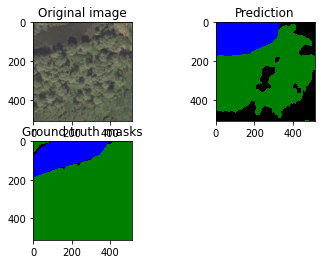

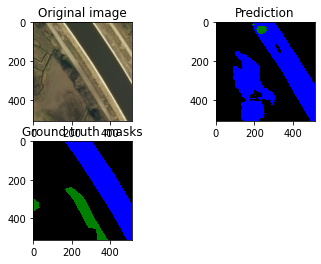

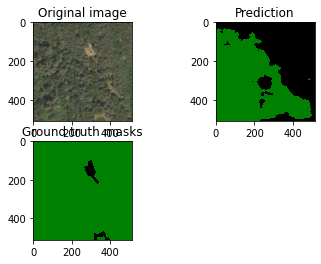

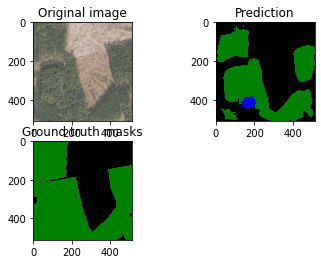

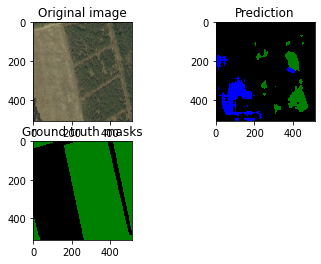

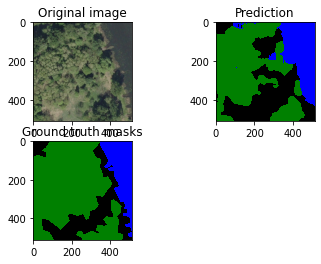

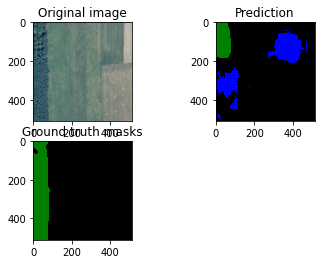

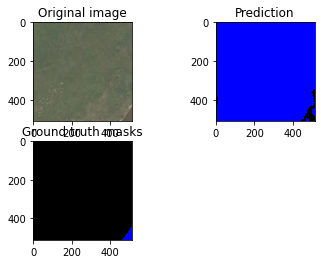

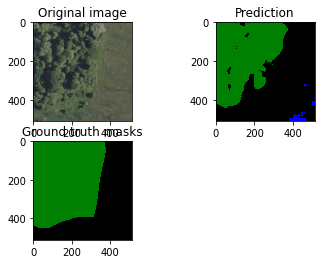

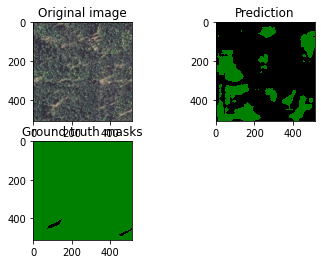

In [12]:
model = torch.load('/share/homes/karmimy/equiv/save_model/rot_equiv_lc/17/rot_equiv_lc.pt',map_location=device)
for i in list_iter:
    print('ITERATION',i,'/',NUMBER_EXAMPLES)
    im,m = test_dataset_no_norm.__getitem__(i)
    x = im.unsqueeze(0).to(device)
    pred = model(x)
    pred = pred['out']
    pred = pred.argmax(dim=1).squeeze().cpu()
    im.transpose_(0,2)
    im.transpose_(0,1)
    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax1.title.set_text('Original image')
    ax1.imshow(im.cpu())
    ax2 = fig.add_subplot(2,2,2)
    ax2.title.set_text('Prediction')
    ax2.imshow(pred,cmap=CMAP,vmin=0,vmax=4,interpolation='nearest')
    ax3 = fig.add_subplot(2,2,3)
    ax3.title.set_text('Ground truth masks')
    ax3.imshow(m.cpu(),cmap=CMAP,vmin=0,vmax=4,interpolation='nearest')

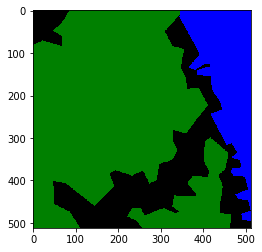

In [13]:
im,m =  test_dataset_no_norm.__getitem__(452)
plt.imshow(m,cmap=CMAP,vmin=0,vmax=3,interpolation='nearest')

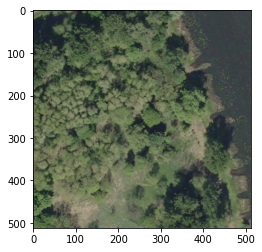

In [14]:
plt.imshow(im.transpose_(0,2).transpose(0,1))
